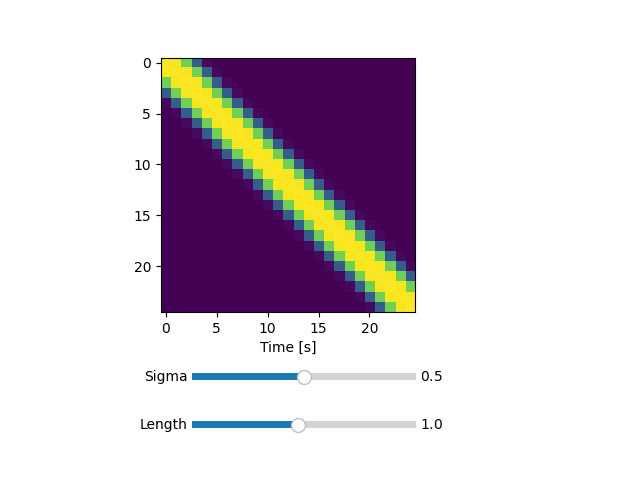

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

%matplotlib widget


# Define initial parameters
init_sigma = 0.5
init_length = 1

x = np.linspace(-5, 5, 25)


# RBF kernel
def kernel(x: np.array, sigma: float = init_sigma, length: float = init_length) -> np.array:
    K = np.empty((25, 25))
    for i, i_val in enumerate(x):
        for j, j_val in enumerate(x):
            diff = i_val - j_val
            K[i, j] = np.exp(-np.dot(diff, diff)**2 / (2 * length**2))
    return sigma**2 * K


# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
img = ax.imshow(kernel(x))
ax.set_xlabel('Time [s]')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.0, bottom=0.35)

# Make a horizontal slider to control the frequency.
axlen = fig.add_axes([0.3, 0.1, 0.35, 0.03])
len_slider = Slider(
    ax=axlen,
    label='Length',
    valmin=0.1,
    valmax=2,
    valinit=init_length,
)

# Make a vertically oriented slider to control the amplitude
axsig = fig.add_axes([0.3, 0.2, 0.35, 0.03])
sigma_slider = Slider(
    ax=axsig,
    label="Sigma",
    valmin=0.0,
    valmax=1.0,
    valinit=init_sigma,
    orientation="horizontal"
)


# The function to be called anytime a slider's value changes
def update(val):
    img.set_data(kernel(x, sigma_slider.val, len_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
len_slider.on_changed(update)
sigma_slider.on_changed(update)

plt.show()
